# Finding the Best Market for Advertisement

For this project, we are working for an e-learning company that offers courses on programming. Most courses are on web and mobile development but we also cover other domains like data science, game development, etc. Our objective is to find the two best markets to advertise in so we can promote our products effectively.

Rather than organizing surveys across different markets which can be costly, we  are going to utilize existing data that has already been cleaned. The data we will use is  from freeCodeCamp's 2017 New Coder Survey which attracted new coders with varying interests which is ideal for the purpose of this analysis. The data can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data). Moving forward, the new coders will be referred to as participants in the survey.

___
### Table of Contents
1. Introduction  
2. Explore the Data  
3. Analysis  
    * 3.1 Sample Representativity  
    * 3.2 Location and Density of Participants  
    * 3.3 How Much are Participants Willing to Spend?  
    * 3.4 Outliers  
4. Results  
5. Conclusion  

___
This project is part of the Junior Data Analyst course through DataQuest and focuses on statistics using Python and libraries such as Pandas, NumPy, Matplotlib, and Seaborn.

## 2. Explore the Data

In [30]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Read in csv file
new_code = pd. read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

#Print first 5 rows
print(new_code.head(5))

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN                 

In [31]:
print(new_code.shape)

(18175, 136)


## 3. Analysis
### 3.1 Sample Representativity
For the purpose of our analysis we want to answer questions about a *population* of new coders.  
  
***Questions to Answer***:  
Where are the new coders located?   
What are the locations with the greatest number of new coders?  
How much money new coders are willing to spend on learning?  

Before we can start to analyze the data we need to find out if the data is representative for our population of interest and whether it has the right categories of people for our purpose.

We will create a frequency distribution using the `JobRoleInterest` column

In [32]:
#Create frequency distribution of JobRoleInterest column as percents
job_freq = new_code['JobRoleInterest'].value_counts(normalize=True) * 100

#Save as a series 
job_freq_series = pd.Series(job_freq).sort_values(ascending = False).dropna()

print(job_freq_series.head(10))
print(len(job_freq_series))
    

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64
3213


A quick look at the frequency distribution tells us that many participants are interested in Web and Mobile Development. We can also see that many people are interest in more than one job role. This still lends itself to a representative sample because people in the real world have many interests. Let's see how many participants are interested in either Web or Mobile Development.

In [33]:
#Create dataframe out of job_freq_series
job_freq_df = pd.Series.to_frame(job_freq_series)
job_freq_df['interests'] = job_freq_df.index

#Define function to determine if participant is interested in Web/Mobile Development
def web_mobile(col):
    if ('Web Developer' or 'Mobile Developer') in col:
        return 'Yes'
    else:
        return 'No'
    
#Create new column and apply function
job_freq_df['mobile_or_web'] = job_freq_df['interests'].apply(web_mobile)

#Verify
print(job_freq_df['mobile_or_web'].head(5))


Full-Stack Web Developer     Yes
  Front-End Web Developer    Yes
  Data Scientist              No
Back-End Web Developer       Yes
  Mobile Developer            No
Name: mobile_or_web, dtype: object


We have now created a column that tells us whether or not that participant is interested in Web or Mobile Development. Let's visualize this distribution with a pie chart.

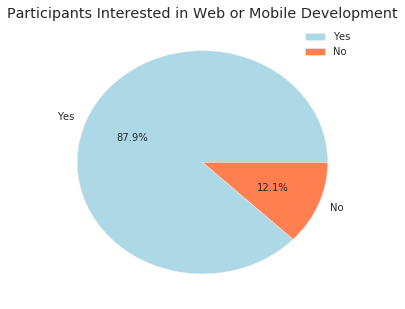

In [34]:
mobile_web_counts = job_freq_df['mobile_or_web'].value_counts()
labels = 'Yes', 'No'
fig, ax = plt.subplots(figsize = (5,5))
ax.pie(mobile_web_counts, labels = labels, autopct='%1.1f%%', colors= ['lightblue','coral'])
ax.legend()
ax.set_title('Participants Interested in Web or Mobile Development')
plt.show()


Now we can see that **87.9% of participants** are interested in Web or Mobile Development so the e-learning company should continue their emphasis in these areas.

### 3.2 Location and Densities of Participants
Next we will use the `CountryLive` column to determine where our participants currently live and how many other coders live there. This will tell us where we can concentrate marketing efforts to have the biggest impact.

In [35]:
#Drop participants who did not indicate a role they were interested in
new_code_copy = new_code[new_code['JobRoleInterest'].notnull()].copy()

#Absolute and relative frequencies
absolute = new_code_copy['CountryLive'].value_counts()
percentages = new_code_copy['CountryLive'].value_counts(normalize=True)*100

#Create Dataframe
frequency_df = pd.DataFrame(data= {'Absolute Frequency': absolute, 'Percentage': percentages})
print(frequency_df.head(10))



                          Absolute Frequency  Percentage
United States of America                3125   45.700497
India                                    528    7.721556
United Kingdom                           315    4.606610
Canada                                   260    3.802281
Poland                                   131    1.915765
Brazil                                   129    1.886517
Germany                                  125    1.828020
Australia                                112    1.637906
Russia                                   102    1.491664
Ukraine                                   89    1.301550


Our absolute and relative frequencies show us that the United States of America and India have the highest proportion of participants in the survey. We could stop our analysis there and say that these are the two best countries to focus marketing efforts but let's continue and find out how much participants are willing to spend on learning. We might find that participants in the United Kingdom (the country with third highest number of participants) are willing to spend a lot more money than most countries so we want to make sure we are targeting the right audience.

### 3.3 How Much are Participants Willing to Spend?
We will use the top 4 countries (United states of America, India, United Kingdom and Canada) because they have the highest frequencies and we want to target English-Speaking audiences since our courses are in English.

We will use the `MoneyForLearning` column to discover how much each participant spends *per month*. This column describes (in American dollars) how much money is spent by each participant from the moment they start coding to when they completed the survey.

We will divide the `MoneyForLearning` column by the `Months Programming` column. Some participants answered that they had been learning to code for 0 months (they may have taken the survey as they began coding) so we will replace 0 months with 1 month to avoid dividing by 
0.

In [36]:
#Replace 0 months with 1 month
new_code_copy['MonthsProgramming'].replace(0,1, inplace=True)

#Create new column by dividing MoneyForLearning by MonthsProgramming
new_code_copy['money_per_month'] = new_code_copy['MoneyForLearning'] / new_code_copy['MonthsProgramming']

#Drop NaN rows
new_code_copy = new_code_copy[new_code_copy['money_per_month'].notnull()]

#Verify new column
print(new_code_copy['money_per_month'].head())


1     13.333333
2    200.000000
3      0.000000
4      0.000000
6      0.000000
Name: money_per_month, dtype: float64


Now we have our new column that shows us how much money each participant has spent per month since they started coding. Next we will group the data by the `CountryLive` column and find out how much money a particicpant spends on average for each country.

First we will remove participants who have NaN in `CountryLive` because they don't contribute to our analysis.

In [37]:
new_code_copy = new_code_copy[new_code_copy['CountryLive'].notnull()]
print(new_code_copy['CountryLive'].value_counts().head(4))

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64


In [38]:
#Calculate total amount of payments per month for each country
total_country = new_code_copy.groupby('CountryLive')['money_per_month'].sum().sort_values(ascending=False)
mean_country  = new_code_copy.groupby('CountryLive')['money_per_month'].mean().sort_values(ascending=False)

#Filter for top 4 countries
top_4 = mean_country[['United States of America', 'India', 'United Kingdom', 'Canada']]
print('Total/Country', '\n', total_country.head(10))
print('\n')
print('Average per Participant',  '\n', mean_country.head(10))
print('\n')
print(
'Top 4 Average', '\n', top_4)

Total/Country 
 CountryLive
United States of America    668718.121808
India                        62551.754651
Spain                        51780.503537
Australia                    42765.382132
Puerto Rico                  30039.761905
Canada                       27242.630637
Russia                       22484.607143
Nigeria                      17085.843915
Austria                      14979.333333
United Kingdom               12704.109639
Name: money_per_month, dtype: float64


Average per Participant 
 CountryLive
Yemen                10000.000000
Puerto Rico           4291.394558
Austria                936.208333
Spain                  784.553084
Jamaica                747.037037
Hong Kong              523.341049
Trinidad & Tobago      500.000000
Australia              419.268452
Taiwan                 417.966524
Luxembourg             338.817664
Name: money_per_month, dtype: float64


Top 4 Average 
 CountryLive
United States of America    227.997996
India                      

The United States is the big spender within our top 4 countries (at $227.99) but it is interesting to note that it is not even in the top 10 when including all other countries. That may mean that countries like Yemen and Puerto Rico have a small number of participants that are willing to spend a lot of money. Participants in the United States spend less but contribute more due to a larger number of participants

Another key point is that both Spain and Puerto Rico were in the top 10 for total country revenue as well as average per participant. These countries were not included in the top 4 because they did not have a high enough number of participants. This points to the fact that a smaller number of participants are willing to pay more money for e-learning. This may be an important untapped market if they are already contributing a large amount of revenue with a small number of participants

###  3.4 Outliers
Let's create a boxplot to see if perhaps there are any outliers that are skewing the data. The results for the average money spent per month of the United Kingdom and Canada seem to be pretty low relative to the values we see for India. This could be due to not having enough representative data, outliers, or our data is correct and there really is a big difference. Let's check by looking for outliers.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



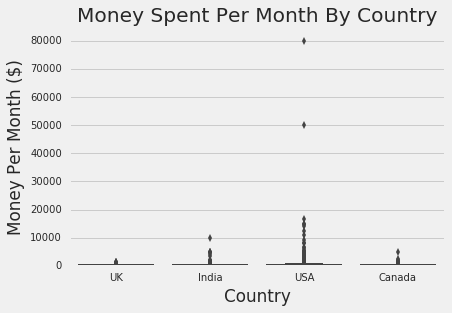

In [39]:
#Assign plot style
plt.style.use('fivethirtyeight')

#Store df for use in plot
UK = new_code_copy[new_code_copy['CountryLive'] == 'United Kingdom']
India = new_code_copy[new_code_copy['CountryLive'] == 'India']
USA = new_code_copy[new_code_copy['CountryLive'] == 'United States of America']
Canada = new_code_copy[new_code_copy['CountryLive'] == 'Canada']
top_4_df = pd.concat([UK, India, USA, Canada])

#Create boxplot
sns.boxplot(data = top_4_df,
           x = 'CountryLive',
           y =  'money_per_month')
plt.ylim(0, 85000)
plt.title('Money Spent Per Month By Country')
plt.xlabel('Country')
plt.ylabel('Money Per Month ($)')
plt.xticks(range(4), ['UK', 'India', 'USA', 'Canada'])
plt.show()



We can easily see that the United States has a few outliers and India as well. Let's get rid of those outliers and recalculate the average money spent per month.

In [40]:
#Filter out rows where participants spend more than $5000 per month
top_4_good = top_4_df[top_4_df['money_per_month'] < 5000]

#recalculate the mean for top 4 countries
top_4_avg = top_4_good.groupby('CountryLive')['money_per_month'].mean()
print(top_4_avg)

CountryLive
Canada                       93.065400
India                        81.812102
United Kingdom               45.534443
United States of America    130.639017
Name: money_per_month, dtype: float64


##  4. Results

| Country | Average Spent/Month | Average Spent W/O Outliers |
| ------- | :-------------------: | :------------------------:|
| USA | 227.99   |   130.64 |
| India  |  135.10 |  81.81 |
| UK | 45.53 | 45.53 |
| Canada | 113.50 | 93.07 |

We removed the outliers and recalculated the average amount of money spent per month by each country and the results are interesting. The United States still spends the most per month out of the top 4 countries. However, initially India was in second highest at 135 per month. After removing the outliers, India fell to third place with 81 per month. Canada moved up to second place with 93 per month.

## 5. Conclusion
Our aim for this project is to choose the two best countries where the company can focus marketing efforts.  

Of the top 4 countries to market in, the United States was still the highest total and average monthly yield, and the country with the second highest average monthly payments was Canada. However, India spends less than 12 fewer dollars per student on average, the company has already had more success securing paying students in India than Canada, and the population of India is vastly greater than Canada. So deciding which country to market in out of the two comes down to one question: Will the potential for higher volume sales in India offset the increased per person revenue gained from Canadian customers.  

It would probably be best to focus marketing in India (rather than Canada) just due to the fact that India has a much bigger population to be reached and they are still willing to spend a decent amount of money per month. However, we will send this analysis to the marketing team and they can use their domain expertise to make a decision.

**The only things we can say for certain is that the United States is the best market for the company to pursue and they should continue emphasizing courses that offer Web and Mobile Development.**